MMSegmentation is a toolbox that provides a framework for unified implementation and evaluation of semantic segmentation methods, and contains high-quality implementations of popular semantic segmentation methods and datasets.

In [ ]:
!python --version
!nvcc --version

Python 3.10.12
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.8/449.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 28.9 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 MB 6.9 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!git checkout main
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 16289, done.
remote: Total 16289 (delta 0), reused 0 (delta 0), pack-reused 16289
Receiving objects: 100% (16289/16289), 22.77 MiB | 13.51 MiB/s, done.
Resolving deltas: 100% (11367/11367), done.
/content/mmsegmentation
Already on 'main'
Your branch is up to date with 'origin/main'.
Obtaining file:///content/mmsegmentation
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmsegmentation


In [ ]:
import mmseg
print(mmseg.__version__)

1.2.1


We provide the most convenient way to use the model in MMSegmentation MMSegInferencer. You can get a segmentation mask for an image with only 3 lines of code.


MMSegInferencer must be initialized from a model, which can be a model name or a Config even a path of config file. The model names can be found in models’ metafile (configs/xxx/metafile.yaml), like one model name of maskformer is maskformer_r50-d32_8xb2-160k_ade20k-512x512, and if input model name and the weights of the model will be download automatically. Few important parameters for it:

* weights (str, optional) - Path to the checkpoint. If it is not specified and model is a model name of metafile, the weights will be loaded from metafile. Defaults to None.

* classes (list, optional) - Input classes for result rendering, as the prediction of segmentation model is a segment map with label indices, classes is a list which includes items responding to the label indices. If classes is not defined, visualizer will take cityscapes classes by default. Defaults to None.

* palette (list, optional) - Input palette for result rendering, which is a list of colors responding to the classes. If the palette is not defined, the visualizer will take the palette of cityscapes by default. Defaults to None.

In [ ]:
!pip install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
# from mmseg.apis import MMSegInferencer
# # Load models into memory
# inferencer = MMSegInferencer(model='deeplabv3plus_r18-d8_4xb2-80k_cityscapes-512x1024')

# images = ['demo/demo.png'] # image1 can be a file path or a np.ndarray
# # Save visualized rendering color maps and predicted results
# # out_dir is the directory to save the output results, img_out_dir and pred_out_dir are subdirectories of out_dir
# # to save visualized rendering color maps and predicted results
# inferencer(images, out_dir='outputs', img_out_dir='vis', pred_out_dir='pred')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r18-d8_512x1024_80k_cityscapes/deeplabv3plus_r18-d8_512x1024_80k_cityscapes_20201226_080942-cff257fe.pth


Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r18-d8_512x1024_80k_cityscapes/deeplabv3plus_r18-d8_512x1024_80k_cityscapes_20201226_080942-cff257fe.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3plus_r18-d8_512x1024_80k_cityscapes_20201226_080942-cff257fe.pth
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


10/23 10:14:28 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.


/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


Output()

{'predictions': array([[5, 5, 5, ..., 2, 2, 2],
        [5, 5, 5, ..., 2, 2, 2],
        [5, 5, 5, ..., 2, 2, 2],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'visualization': []}

In [ ]:
# ## All the various models and their configurations that mmseg has
# from mmseg.apis import MMSegInferencer
# models = MMSegInferencer.list_models('mmseg')

10/21 18:51:05 - mmengine - INFO - model_name: ann_r50-d8_4xb2-40k_cityscapes-512x1024
model_name: ann_r101-d8_4xb2-40k_cityscapes-512x1024
model_name: ann_r50-d8_4xb2-40k_cityscapes-769x769
model_name: ann_r101-d8_4xb2-40k_cityscapes-769x769
model_name: ann_r50-d8_4xb2-80k_cityscapes-512x1024
model_name: ann_r101-d8_4xb2-80k_cityscapes-512x1024
model_name: ann_r50-d8_4xb2-80k_cityscapes-769x769
model_name: ann_r101-d8_4xb2-80k_cityscapes-769x769
model_name: ann_r50-d8_4xb4-80k_ade20k-512x512
model_name: ann_r101-d8_4xb4-80k_ade20k-512x512
model_name: ann_r50-d8_4xb4-160k_ade20k-512x512
model_name: ann_r101-d8_4xb4-160k_ade20k-512x512
model_name: ann_r50-d8_4xb4-20k_voc12aug-512x512
model_name: ann_r101-d8_4xb4-20k_voc12aug-512x512
model_name: ann_r50-d8_4xb4-40k_voc12aug-512x512
model_name: ann_r101-d8_4xb4-40k_voc12aug-512x512
model_name: apcnet_r50-d8_4xb2-40k_cityscapes-512x1024
model_name: apcnet_r101-d8_4xb2-40k_cityscapes-512x1024
model_name: apcnet_r50-d8_4xb2-40k_cityscapes-76

Inference API

* mmseg.apis.init_model -> Initialize a segmentor from config file.
* mmseg.apis.inference_model -> Inference image(s) with the segmentor.
* mmseg.apis.show_result_pyplot-> Visualize the segmentation results on the image.

In [ ]:
# ## This is to create our own model using our checkpoint path(weights)

# from mmseg.apis import init_model, inference_model, show_result_pyplot

# config_path = 'configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
# checkpoint_path = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'
# checkpoint_path = None

# img_path = 'demo/demo.png'


# # build the model from a config file and a checkpoint file
# model = init_model(config_path, checkpoint_path, device='cuda:0')

# # inference on given image
# result = inference_model(model, img_path)

# # display the segmentation result
# # vis_image = show_result_pyplot(model, img_path, result)

# # # save the visualization result, the output image would be found at the path `work_dirs/result.png`
# vis_iamge = show_result_pyplot(model, img_path, result, out_file='work_dirs/result.png')

# # # Modify the time of displaying images, note that 0 is the special value that means "forever"
# # vis_image = show_result_pyplot(model, img_path, result, wait_time=5)

AttributeError: ignored

In [ ]:
# ## The above code automated by the MMSeg
# inferencer = MMSegInferencer(model='pspnet_r50-d8_4xb2-40k_cityscapes-512x1024')
# images = ['demo/demo.png']
# inferencer(images, out_dir='outputs', img_out_dir='vis2', pred_out_dir='pred2')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth" to /root/.cache/torch/hub/checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Output()

{'predictions': array([[2, 2, 5, ..., 2, 2, 2],
        [2, 2, 5, ..., 2, 2, 2],
        [2, 2, 5, ..., 2, 2, 2],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'visualization': []}

SegFormer works on any input size, as it pads the input to be divisible by config.patch_sizes.
One can use SegformerImageProcessor to prepare images and corresponding segmentation maps for the model.

Now, How to train on your own dataset and visualize the results.

In [ ]:
# # download and unzip
# !wget http://dags.stanford.edu/data/iccv09Data.tar.gz -O stanford_background.tar.gz
# !tar xf stanford_background.tar.gz

--2023-10-21 18:57:22--  http://dags.stanford.edu/data/iccv09Data.tar.gz
Resolving dags.stanford.edu (dags.stanford.edu)... 171.64.68.10
Connecting to dags.stanford.edu (dags.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14727974 (14M) [application/x-gzip]
Saving to: ‘stanford_background.tar.gz’

stanford_background 100%[===================>]  14.04M  7.16MB/s    in 2.0s    

2023-10-21 18:57:24 (7.16 MB/s) - ‘stanford_background.tar.gz’ saved [14727974/14727974]



Uploaded my data

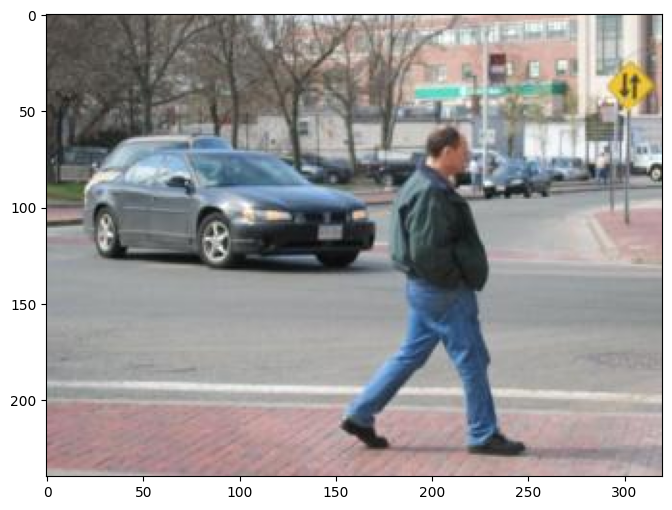

In [ ]:
# # Let's take a look at the dataset
# import mmcv
# import mmengine
# import matplotlib.pyplot as plt


# img = mmcv.imread('iccv09Data/images/6000124.jpg')
# plt.figure(figsize=(8, 6))
# plt.imshow(mmcv.bgr2rgb(img))
# plt.show()

In [ ]:
# # define dataset root and directory for images and annotations
# data_root = 'iccv09Data'
# img_dir = 'images'
# ann_dir = 'labels'
# # define class and palette for better visualization
# classes = ('sky', 'tree', 'road', 'grass', 'water', 'bldg', 'mntn', 'fg obj')
# palette = [[128, 128, 128], [129, 127, 38], [120, 69, 125], [53, 125, 34],
#            [0, 11, 123], [118, 20, 12], [122, 81, 25], [241, 134, 51]]

In [ ]:
# import os.path as osp
# import numpy as np
# from PIL import Image

# # convert dataset annotation to semantic segmentation map
# for file in mmengine.scandir(osp.join(data_root, ann_dir), suffix='.regions.txt'):
#   seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
#   seg_img = Image.fromarray(seg_map).convert('P')
#   seg_img.putpalette(np.array(palette, dtype=np.uint8))
#   seg_img.save(osp.join(data_root, ann_dir, file.replace('.regions.txt',
#                                                          '.png')))

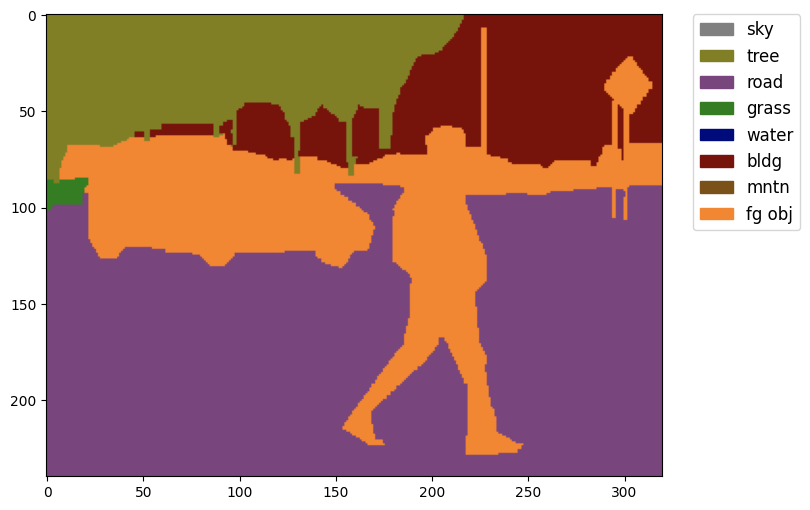

In [ ]:
# # Let's take a look at the segmentation map we got
# import matplotlib.patches as mpatches
# img = Image.open('iccv09Data/labels/6000124.png')
# plt.figure(figsize=(8, 6))
# im = plt.imshow(np.array(img.convert('RGB')))

# # create a patch (proxy artist) for every color
# patches = [mpatches.Patch(color=np.array(palette[i])/255.,
#                           label=classes[i]) for i in range(8)]
# # put those patched as legend-handles into the legend
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
#            fontsize='large')

# plt.show()

In [ ]:
# # split train/val set randomly
# split_dir = 'splits'
# mmengine.mkdir_or_exist(osp.join(data_root, split_dir))
# filename_list = [osp.splitext(filename)[0] for filename in mmengine.scandir(
#     osp.join(data_root, ann_dir), suffix='.png')]
# with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
#   # select first 4/5 as train set
#   train_length = int(len(filename_list)*4/5)
#   f.writelines(line + '\n' for line in filename_list[:train_length])
# with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
#   # select last 1/5 as train set
#   f.writelines(line + '\n' for line in filename_list[train_length:])

In [ ]:
# from mmseg.registry import DATASETS
# from mmseg.datasets import BaseSegDataset


# @DATASETS.register_module()
# class StanfordBackgroundDataset(BaseSegDataset):
#   METAINFO = dict(classes = classes, palette = palette)
#   def __init__(self, **kwargs):
#     super().__init__(img_suffix='.jpg', seg_map_suffix='.png', **kwargs)


In [ ]:
# # Download config and checkpoint files
# !mim download mmsegmentation --config pspnet_r50-d8_4xb2-40k_cityscapes-512x1024 --dest .
# from mmengine import Config
# cfg = Config.fromfile('configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py')
# print(f'Config:\n{cfg.pretty_text}')

processing pspnet_r50-d8_4xb2-40k_cityscapes-512x1024...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.1/187.1 MiB 65.3 MB/s eta 0:00:00
Successfully downloaded pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth to /content/mmsegmentation
Successfully dumped pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py to /content/mmsegmentation
Config:
crop_size = (
    512,
    1024,
)
data_preprocessor = dict(
    bgr_to_rgb=True,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        1024,
    ),
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type='SegDataPreProcessor')
data_root = 'data/cityscapes/'
dataset_type = 'CityscapesDataset'
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=4000, type='CheckpointHook'),
    logger=dict(interval=50, log_metric_by_epoch=False, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_see

In [ ]:
# # Since we use only one GPU, BN is used instead of SyncBN
# cfg.norm_cfg = dict(type='BN', requires_grad=True)
# cfg.crop_size = (256, 256)
# cfg.model.data_preprocessor.size = cfg.crop_size
# cfg.model.backbone.norm_cfg = cfg.norm_cfg
# cfg.model.decode_head.norm_cfg = cfg.norm_cfg
# cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# # modify num classes of the model in decode/auxiliary head
# cfg.model.decode_head.num_classes = 8
# cfg.model.auxiliary_head.num_classes = 8

# # Modify dataset type and path
# cfg.dataset_type = 'StanfordBackgroundDataset'
# cfg.data_root = data_root

# cfg.train_dataloader.batch_size = 8

# cfg.train_pipeline = [
#     dict(type='LoadImageFromFile'),
#     dict(type='LoadAnnotations'),
#     dict(type='RandomResize', scale=(320, 240), ratio_range=(0.5, 2.0), keep_ratio=True),
#     dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
#     dict(type='RandomFlip', prob=0.5),
#     dict(type='PackSegInputs')
# ]

# cfg.test_pipeline = [
#     dict(type='LoadImageFromFile'),
#     dict(type='Resize', scale=(320, 240), keep_ratio=True),
#     # add loading annotation after ``Resize`` because ground truth
#     # does not need to do resize data transform
#     dict(type='LoadAnnotations'),
#     dict(type='PackSegInputs')
# ]


# cfg.train_dataloader.dataset.type = cfg.dataset_type
# cfg.train_dataloader.dataset.data_root = cfg.data_root
# cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
# cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
# cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

# cfg.val_dataloader.dataset.type = cfg.dataset_type
# cfg.val_dataloader.dataset.data_root = cfg.data_root
# cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
# cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
# cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

# cfg.test_dataloader = cfg.val_dataloader


# # Load the pretrained weights
# cfg.load_from = 'pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# # Set up working dir to save files and logs.
# cfg.work_dir = './work_dirs/tutorial'

# cfg.train_cfg.max_iters = 200
# cfg.train_cfg.val_interval = 200
# cfg.default_hooks.logger.interval = 10
# cfg.default_hooks.checkpoint.interval = 200

# # Set seed to facilitate reproducing the result
# cfg['randomness'] = dict(seed=0)

# # Let's have a look at the final config used for training
# print(f'Config:\n{cfg.pretty_text}')

Config:
crop_size = (
    256,
    256,
)
data_preprocessor = dict(
    bgr_to_rgb=True,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        1024,
    ),
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type='SegDataPreProcessor')
data_root = 'iccv09Data'
dataset_type = 'StanfordBackgroundDataset'
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=200, type='CheckpointHook'),
    logger=dict(interval=10, log_metric_by_epoch=False, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='SegVisualizationHook'))
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
img_ratios = [
    0.5,
    0.75,
    1.0,
    1.25,
    1.5,
    1.

In [ ]:
# from mmengine.runner import Runner

# runner = Runner.from_cfg(cfg)

10/21 18:58:02 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: False
    numpy_random_seed: 0
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=11.8, CUDNN_VERSION=8.7.0, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX11_ABI=0 -fabi-version=11 -fvisibility-inlines-hid

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ig

10/21 18:58:04 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
10/21 18:58:04 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
# # start training
# runner.train()

10/21 18:58:06 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


10/21 18:58:06 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
10/21 18:58:06 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c


Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet50_v1c-2cccc1ad.pth" to /root/.cache/torch/hub/checkpoints/resnet50_v1c-2cccc1ad.pth


10/21 18:58:14 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([19, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
10/21 18:58:15 - mm

IndexError: ignored

In [ ]:
# from mmseg.apis import init_model, inference_model, show_result_pyplot

# # Init the model from the config and the checkpoint
# checkpoint_path = './work_dirs/tutorial/iter_200.pth'
# model = init_model(cfg, checkpoint_path, 'cuda:0')

# img = mmcv.imread('iccv09Data/images/6000124.jpg')
# result = inference_model(model, img)
# plt.figure(figsize=(8, 6))
# vis_result = show_result_pyplot(model, img, result)
# plt.imshow(mmcv.bgr2rgb(vis_result))


What we have gained from this is:

We can use our dataset and annotated segmentated maps(ground truth) use the popular datasets and models config file, modify them according to our need and train a model based on our requirements. Reducing much of our efforts.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! cp /content/drive/MyDrive/ipdata.zip /content
! unzip /content/ipdata.zip

Mounted at /content/drive
Archive:  /content/ipdata.zip
   creating: ipdata/img/
  inflating: ipdata/img/PE-GJ-28373-102_2.png  
  inflating: ipdata/img/PE-GJ-28373-103_1.png  
  inflating: ipdata/img/PE-GJ-28373-107_1.png  
  inflating: ipdata/img/PE-GJ-28373-107_2.png  
  inflating: ipdata/img/PE-GJ-28373-110_2.png  
  inflating: ipdata/img/PE-GJ-28373-117_1.png  
  inflating: ipdata/img/PE-GJ-28373-117_2.png  
  inflating: ipdata/img/PE-GJ-28373-84_2.png  
  inflating: ipdata/img/PE-GJ-55512-25_2.png  
  inflating: ipdata/img/PE-GJ-59460-59_1.png  
  inflating: ipdata/img/PE-GJ-59460-59_2.png  
  inflating: ipdata/img/PE-GJ-59461-86_2.png  
  inflating: ipdata/img/PE-GJ-77342-78_1.png  
  inflating: ipdata/img/PE-GJ-77342-78_2.png  
  inflating: ipdata/img/PE-KA-75040-61_1.png  
  inflating: ipdata/img/PE-KA-79198-40_1.png  
  inflating: ipdata/img/PE-KA-79198-40_2.png  
  inflating: ipdata/img/PE-KA-82727-30_1.png  
  inflating: ipdata/img/PE-KA-82727-30_2.png  
  inflating: ipdata

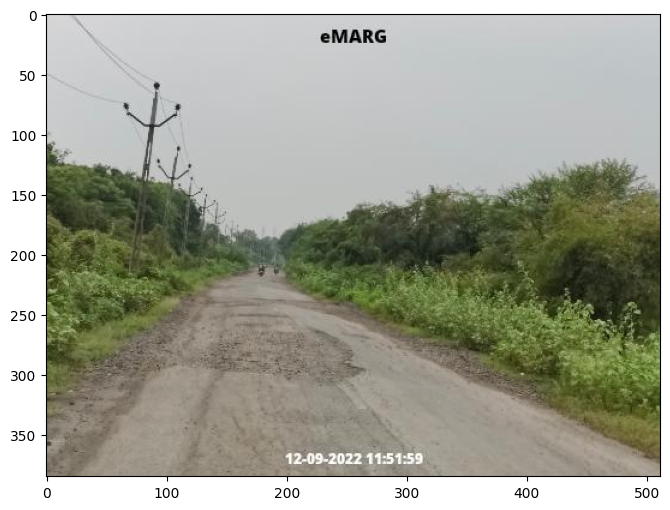

In [ ]:
# Let's take a look at the dataset
import mmcv
import mmengine
import os.path as osp
import matplotlib.pyplot as plt


img = mmcv.imread('ipdata/img/PE-GJ-28373-102_2.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
# define dataset root and directory for images and annotations
data_root = 'ipdata'
img_dir = 'img'
ann_dir = 'label'
# define class and palette for better visualization
classes = ('_background_','Road', 'Potholes', 'Vegetation', 'Shoulder', 'Buildings', 'Sky', 'Car' )
#palette is not rgb but bgr
palette = [[0,0,0], [128, 0, 0], [0, 128, 0], [0, 0, 128], [128, 128, 0], [128,0,128], [0, 128, 128], [128, 128, 128]]

<ipython-input-8-3207f647928c>:15: UserWarning: The label '_background_' of <matplotlib.patches.Patch object at 0x78f14fd66890> starts with '_'. It is thus excluded from the legend.
  plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,


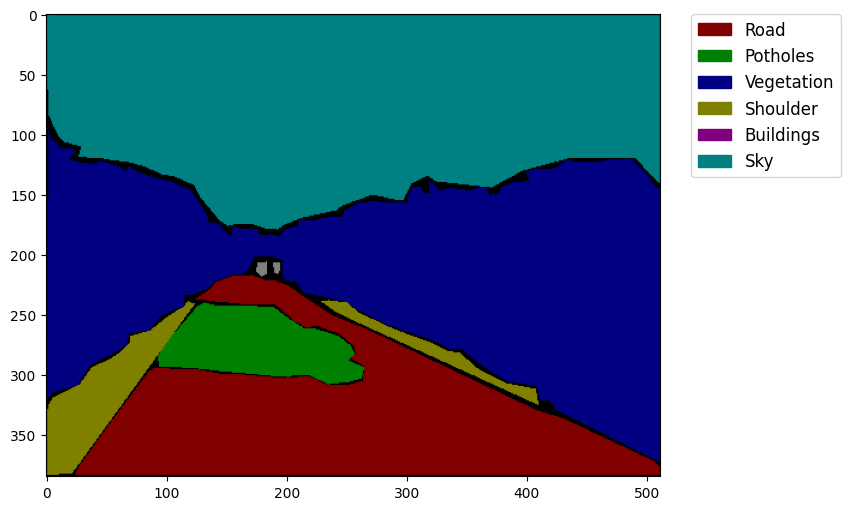

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
from PIL import Image
import os.path as osp
import numpy as np

img = Image.open('ipdata/label/PE-GJ-28373-102_2.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color
patches = [mpatches.Patch(color=np.array(palette[i])/255.,
                          label=classes[i]) for i in range(7)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
           fontsize='large')

plt.show()

In [ ]:
# split train/val set randomly
split_dir = 'splits'
mmengine.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmengine.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  f.writelines(line + '\n' for line in filename_list)
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  f.writelines(line + '\n' for line in filename_list)

In [ ]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset


@DATASETS.register_module()
class IPData(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='.png', **kwargs)


In [ ]:
# Download config and checkpoint files
!mim download mmsegmentation --config pspnet_r50-d8_4xb2-40k_cityscapes-512x1024 --dest .

processing pspnet_r50-d8_4xb2-40k_cityscapes-512x1024...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.1/187.1 MiB 14.8 MB/s eta 0:00:00
Successfully downloaded pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth to /content/mmsegmentation
Successfully dumped pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py to /content/mmsegmentation


In [ ]:
from mmengine import Config
cfg = Config.fromfile('configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
crop_size = (
    512,
    1024,
)
data_preprocessor = dict(
    bgr_to_rgb=True,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        1024,
    ),
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type='SegDataPreProcessor')
data_root = 'data/cityscapes/'
dataset_type = 'CityscapesDataset'
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=4000, type='CheckpointHook'),
    logger=dict(interval=50, log_metric_by_epoch=False, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='SegVisualizationHook'))
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
img_ratios = [
    0.5,
    0.75,
    1.0,
    1.25,
    1.5,
    1.

In [ ]:
# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
# cfg.crop_size = (512, 512)
cfg.crop_size = (256, 256)

cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 8
cfg.model.auxiliary_head.num_classes = 8

# Modify dataset type and path
cfg.dataset_type = 'IPData'
cfg.data_root = data_root

cfg.train_dataloader.batch_size = 8

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(512, 384), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(512, 384), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]


cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader


# Load the pretrained weights
cfg.load_from = 'pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = 200
cfg.train_cfg.val_interval = 200
cfg.default_hooks.logger.interval = 10
cfg.default_hooks.checkpoint.interval = 200
cfg.test_cfg.show_class = False


# Set seed to facilitate reproducing the result
cfg['randomness'] = dict(seed=0)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
crop_size = (
    256,
    256,
)
data_preprocessor = dict(
    bgr_to_rgb=True,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        1024,
    ),
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type='SegDataPreProcessor')
data_root = 'ipdata'
dataset_type = 'IPData'
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=200, type='CheckpointHook'),
    logger=dict(interval=10, log_metric_by_epoch=False, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='SegVisualizationHook'))
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
img_ratios = [
    0.5,
    0.75,
    1.0,
    1.25,
    1.5,
    1.75,
]
load_from = 'pspn

In [ ]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)

10/23 20:51:14 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm

/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


10/23 20:51:21 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
10/23 20:51:21 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
# start training
runner.train()

10/23 20:51:39 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


10/23 20:51:39 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
10/23 20:51:39 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c


Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet50_v1c-2cccc1ad.pth" to /root/.cache/torch/hub/checkpoints/resnet50_v1c-2cccc1ad.pth


10/23 20:51:50 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([19, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
10/23 20:51:51 - mm

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


10/23 20:54:18 - mmengine - INFO - Iter(val) [ 10/291]    eta: 0:05:13  time: 1.1164  data_time: 0.0407  memory: 9232  
10/23 20:54:22 - mmengine - INFO - Iter(val) [ 20/291]    eta: 0:03:29  time: 0.4261  data_time: 0.0072  memory: 9187  
10/23 20:54:23 - mmengine - INFO - Iter(val) [ 30/291]    eta: 0:02:20  time: 0.0766  data_time: 0.0099  memory: 1047  
10/23 20:54:24 - mmengine - INFO - Iter(val) [ 40/291]    eta: 0:01:45  time: 0.0688  data_time: 0.0113  memory: 689  
10/23 20:54:24 - mmengine - INFO - Iter(val) [ 50/291]    eta: 0:01:24  time: 0.0718  data_time: 0.0078  memory: 689  
10/23 20:54:25 - mmengine - INFO - Iter(val) [ 60/291]    eta: 0:01:10  time: 0.0723  data_time: 0.0099  memory: 689  
10/23 20:54:26 - mmengine - INFO - Iter(val) [ 70/291]    eta: 0:00:59  time: 0.0677  data_time: 0.0080  memory: 689  
10/23 20:54:30 - mmengine - INFO - Iter(val) [ 80/291]    eta: 0:01:01  time: 0.4360  data_time: 0.0050  memory: 9204  
10/23 20:54:33 - mmengine - INFO - Iter(val)

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

In [ ]:
from mmseg.apis import init_model, inference_model, show_result_pyplot


checkpoint_path = './work_dirs/tutorial/iter_200.pth'

model = init_model(cfg, checkpoint_path)
files = os.listdir('ipdata/img')
for file in files:
    # print(file)
    img_path = 'ipdata/img/' + file
    img = mmcv.imread(img_path)
    result = inference_model(model, img)
    vis_img = show_result_pyplot(model, img, result, out_file=f'work_dirs/{file}')


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_200.pth


/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_200.pth


/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


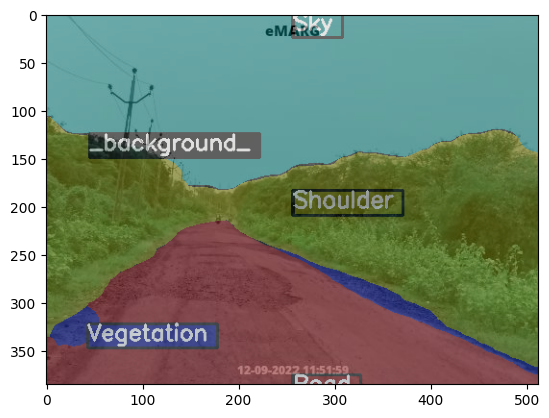

In [ ]:
from mmseg.apis import init_model, inference_model, show_result_pyplot


checkpoint_path = './work_dirs/tutorial/iter_200.pth'
cfg.test_cfg.show_class = False
model = init_model(cfg, checkpoint_path, device='cuda:0')

img_path = 'ipdata/img/PE-GJ-28373-102_2.png'
img = mmcv.imread(img_path)
result = inference_model(model, img)
vis_img = show_result_pyplot(model, img, result)
# print(type(vis_img))
plt.imshow(vis_img)


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_200.pth


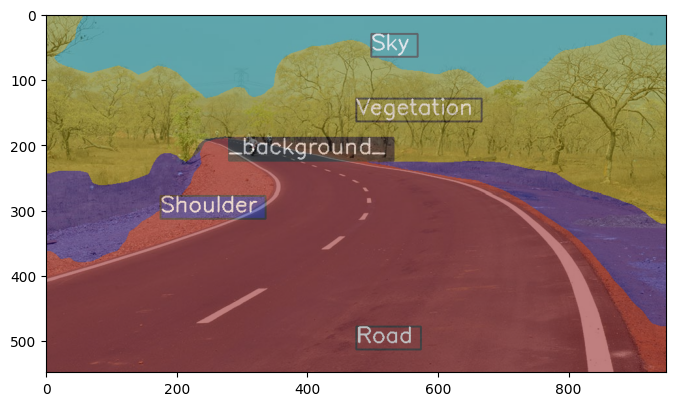

In [ ]:
from mmseg.apis import init_model, inference_model, show_result_pyplot

# Init the model from the config and the checkpoint
checkpoint_path = './work_dirs/tutorial/iter_200.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')
# img = mmcv.imread('ipdata/img/PE-GJ-55512-25_2.png')
img = mmcv.imread('/content/38719-Rural-Roads.jpg')

result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))


# __BREAKER__

Initialization

MMSegInferencer must be initialized from a model, which can be a model name or a Config even a path of config file.

Below are other input parameters:

weights (str, optional) - Path to the checkpoint. If it is not specified and model is a model name of metafile, the weights will be loaded from metafile. Defaults to None. (We can work with this)

classes (list, optional) - Input classes for result rendering, as the prediction of segmentation model is a segment map with label indices, classes is a list which includes items responding to the label indices. If classes is not defined, visualizer will take cityscapes classes by default. Defaults to None.

palette (list, optional) - Input palette for result rendering, which is a list of colors responding to the classes. If the palette is not defined, the visualizer will take the palette of cityscapes by default. Defaults to None.

dataset_name (str, optional) - Dataset name or alias, visualizer will use the meta information of the dataset i.e. classes and palette, but the classes and palette have higher priority. Defaults to None.

device (str, optional) - Device to run inference. If None, the available device will be automatically used. Defaults to None.

scope (str, optional) - The scope of the model. Defaults to ‘mmseg’.

For the mmseg.apis.init_model
(I will try resnet base without loading any weight)

checkpoint (str, optional) - Checkpoint path. If left as None, the model will not load any weights.


/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_200.pth


/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


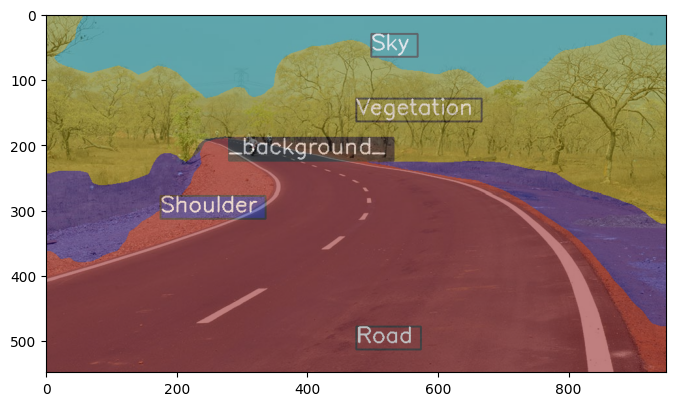

In [ ]:
# Init the model from the config and the checkpoint
checkpoint_path = './work_dirs/tutorial/iter_200.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')
# img = mmcv.imread('ipdata/img/PE-GJ-55512-25_2.png')
img = mmcv.imread('/content/38719-Rural-Roads.jpg')

result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))
